In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [30]:
df = pd.read_csv('data/sleep.csv')

In [31]:
df.sample(15)

,Start,End,Time Zone,Duration,Restful Minutes,Restless Minutes,Awake Minutes
1078,2020-05-11 9:19 PM,2020-05-12 5:22 AM,CDT,483,456,24,3
524,2021-12-18 9:54 PM,2021-12-19 6:48 AM,CDT,534,512,22,1
413,2022-04-09 12:08 AM,2022-04-09 6:00 AM,CDT,351,337,14,0
1064,2020-05-25 10:42 PM,2020-05-26 5:34 AM,CDT,412,399,13,1
405,2022-04-17 11:14 PM,2022-04-18 5:57 AM,CDT,403,382,13,8
490,2022-01-22 11:36 PM,2022-01-23 6:18 AM,CDT,402,385,16,1
557,2021-11-15 6:48 PM,2021-11-16 5:53 AM,CDT,666,621,36,9
555,2021-11-17 11:22 PM,2021-11-18 6:09 AM,CDT,407,393,13,0
715,2021-05-21 9:28 PM,2021-05-22 5:46 AM,CDT,497,477,15,5
325,2022-07-11 10:38 PM,2022-07-12 5:44 AM,CDT,427,412,15,0


In [32]:
df.describe()

,Duration,Restful Minutes,Restless Minutes,Awake Minutes
count,1185.000000,1185.000000,1185.000000,1185.000000
mean,426.836287,384.337553,12.983966,5.434599
std,78.969676,95.047405,11.687322,8.774636
min,86.000000,0.000000,0.000000,0.000000
25%,387.000000,341.000000,8.000000,0.000000
50%,418.000000,394.000000,12.000000,2.000000
75%,453.000000,432.000000,16.000000,7.000000
max,963.000000,884.000000,121.000000,84.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Start              1185 non-null   object
 1   End                1185 non-null   object
 2   Time Zone          1185 non-null   object
 3   Duration           1185 non-null   int64 
 4   Restful Minutes    1185 non-null   int64 
 5    Restless Minutes  1185 non-null   int64 
 6    Awake Minutes     1185 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 64.9+ KB


In [34]:
# Make a copy of the original, keep working with df
df_original = df

In [35]:
# remove spaces in 'restless min' and 'awake min' columns
df = df.rename(columns={' Restless Minutes': 'Restless Minutes', ' Awake Minutes': 'Awake Minutes'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start             1185 non-null   object
 1   End               1185 non-null   object
 2   Time Zone         1185 non-null   object
 3   Duration          1185 non-null   int64 
 4   Restful Minutes   1185 non-null   int64 
 5   Restless Minutes  1185 non-null   int64 
 6   Awake Minutes     1185 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 64.9+ KB


In [36]:
# drop 'time zone' column, not needed
df.drop("Time Zone", axis=1, inplace = True)
df.head()

,Start,End,Duration,Restful Minutes,Restless Minutes,Awake Minutes
0,2023-06-27 11:39 PM,2023-06-28 6:07 AM,388,216,0,6
1,2023-06-26 11:50 PM,2023-06-27 6:07 AM,376,230,0,6
2,2023-06-25 11:04 PM,2023-06-26 6:07 AM,423,216,0,14
3,2023-06-25 12:12 AM,2023-06-25 9:00 AM,528,505,22,1
4,2023-06-23 11:09 PM,2023-06-24 6:47 AM,458,441,15,2


In [42]:
# convert start and end to datetime data types
pd.to_datetime(df['Start'])
pd.to_datetime(df['End'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start             1185 non-null   object
 1   End               1185 non-null   object
 2   Duration          1185 non-null   int64 
 3   Restful Minutes   1185 non-null   int64 
 4   Restless Minutes  1185 non-null   int64 
 5   Awake Minutes     1185 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 55.7+ KB


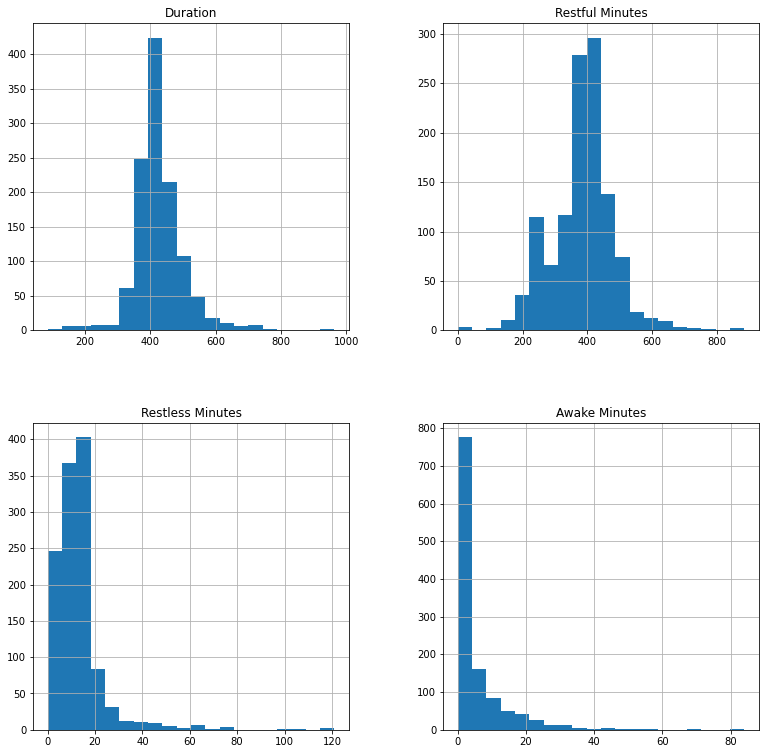

In [37]:
# Histograms of dataset
df.hist(figsize=(13,13), bins = 20);

It looks like I'm in bed for 426 minutes (7.1 hours) on average, and on average I get 384 minutes (6.4 hours) of restful sleep. To get more insights, I'm going to split the `Start` and `End` columns into `Start Time` / `Start Date` and `End Time` / `End Date`

In [39]:
# convert date columns to date data type, time columns to time data type
#pd.to_datetime(df['Start Date'])
#pd.to_datetime(df['End Date'])
#df['Start Time'] = pd.to_datetime(df['Start Time'],format= '%H:%M:%S' ).dt.time
#df['End Time'] = pd.to_datetime(df['End Time'],format= '%H:%M:%S' ).dt.time

In [40]:
# Drop Start and End columns
#df.drop(columns=['Start', 'End'], inplace=True)
#df.head()

In [41]:
# fix order of columns so they make sense
#df = df[['Start Date', 'Start Time', 'End Date', 'End Time', 'Duration', 'Restful Minutes', 'Restless Minutes', 'Awake Minutes']]
#df.sample(15)